<a href="https://colab.research.google.com/github/kiplangat-david/DSC-WK9-IP/blob/main/kiplangat_david_ipwk9_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Analytic Question**

 Implement a K-nearest neighbor (kNN) classifier on Titanic Dataset to classify passenger survival




##**Metrics For Success**

 This project will be successful if our model achieves an accuracy of 70-95% and with minimum number of false predictions as possible.

##**Context**


-The Titanic was a luxury British steamship that sank on April 15, 1912, en route to New York from Southampton, England, on its maiden voyage after striking an iceberge

-The ship's passengers were divided into three separate classes determined by the price of their ticket:
  - first class - which consisted of the wealthiest passengers; included prominent members of the upper class, businessmen, politicians, high-ranking military personnel, industrialists, bankers, entertainers, socialites, and professional athletes. 
  - Second-class passengers were predominantly middle-class travellers and included professors, authors, clergymen, and tourists. 
  - Third-class or steerage passengers were primarily immigrants moving to the United States and Canada

-Titanic's passengers numbered 1,317 people: 324 in first class, 284 in second class, and 709 in third class. Of these, 805 were male and 434 were female; 112 children were aboard, the largest number of which were in third class.[5] The ship was considerably under capacity on her maiden voyage, as she could accommodate 2,453 passengers—833 first class, 614 second class, and 1,006 third class

-The Titanic carried 20 lifeboats, enough for 1178 people out of the 30 lifeboats required

-Out of the individuals who were sailing, only 706 survived


#Experimental Design

- Import Libraries
- Load Dataset
- Data Cleaning
- Exploratory Data Analysis
- Feature Engineering
- Train knn Model
- Conclusions
- Recommendations

##**Data Relevance**

We are using Titanic dataset ([Link](https://archive.org/download/train5_202002/train%20%285%29.csv)) for this project. The dataset contains the following features:

  -PassengerId: Passenger personal identification labelled as 1,2,3,...,891

  -Survived: Tells whether a passenger survived or not (0:Not survived, 1:survived)

  -***Pclass:*** Passenger class. There are 3 classes; 1,2,3

  -***Name:***Passenger name and title

  -***Sex:*** Passenger gender; male or female

  -***Age:*** Age of the passenger

  -***SibSp:***Number of spouses/siblings aboard

  -***Parch:*** Number of Parents/Children Aboard

  -***Ticket:*** Ticket number

  -***Fare:*** Passenger Fare

  -***Cabin:*** Cabin

  -***Embarked:*** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Our dataset records are similar to kaggle Titanic dataset found [here](https://www.kaggle.com/azeembootwala/titanic?select=train_data.csv)

##**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
palette = ['blue','pink']
sns.set_palette(palette)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix


##**Load Dataset**

In [ ]:
data = pd.read_csv('/content/train (5).csv')

In [ ]:
#view top 5 records
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#view bottome 5 records
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#view random 5 sample records
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.000,C78,Q
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.000,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,NaN,S
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.775,NaN,S
602,603,0,1,"Harrington, Mr. Charles H",male,NaN,0,0,113796,42.400,NaN,S


Our dataset contains true records of expected rows and columns

In [ ]:
#check number of rows and columns in our dataset
print('This dataset has',data.shape[0],'rows and',data.shape[1],'columns')

This dataset has 891 rows and 12 columns


Our dataset has 891 instances and 12 attributes

In [ ]:
#check data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


-There are 7 numerical variables and 5 categorical variables in the dataset.

-11 variables are our feature variables and only one ('survived' column) is our target variable. Our target variable is a discrete type


##**Data Cleaning**
Here we will check and deal with:
   - Missing values 
   - Duplicates 
   - Outliers & anomalies

In [ ]:
#check for missing values
#we will check percentages
print('Percentage of Missing values:\n',(data.isnull().sum()/len(data))*100)

Percentage of Missing values:
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


-Age, cabin and embarked columns has missing values. 

-Age column has 19.86% missing values, cabin has 77.10% and Embarked column has 0.22%

-Age numerical and positively skewed as you see later in the visualizations, therefore we will impute with median

-We will drop Cabin column because its missing values are too many. It will negatively affect our analysis

-Embarked column is categorical and so we will impute with the mode

In [ ]:
#fill 'Age' with median
data['Age'].fillna(data['Age'].median(),inplace=True)

#fill 'Embarked' with mode
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

#drop 'Cabin' column
data.drop('Cabin',axis=1,inplace=True)

Next we will check and deal with the duplicates

In [ ]:
#check duplicates
data.duplicated().sum()

0

-Our dataset has no duplicates.

-Let's look at the outliers and anomalies

##**Outliers and Anomalies**

-Here we will plot boxplots 

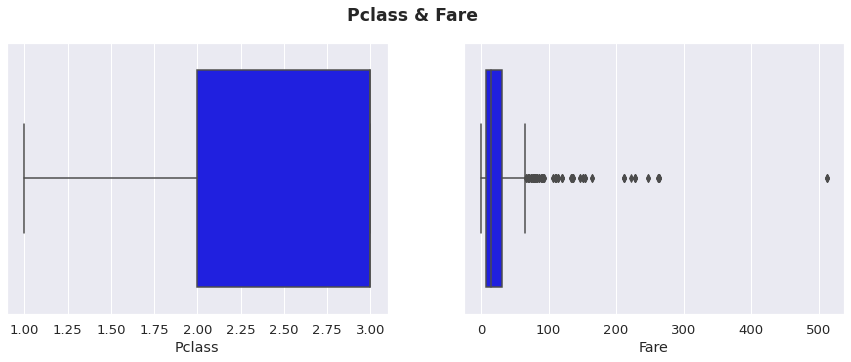

In [ ]:

#Pclass & Fare
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Pclass & Fare',weight='bold')
sns.boxplot(ax=axes[0],x=data['Pclass'])
sns.boxplot(ax=axes[1],x=data['Fare'])

-Pclass has no outliers.

-Fare column contain outliers. Titanic had 3 classes of passengers
- First class passengers were some of the richest and most important people of the time. They included businessmen like John Jacob Astor IV and Benjamin Guggenheim, as well as members of the upper classes and even sportsmen.

- Many of the second class passengers were tourists, made up of professions such as teachers and clergy
- The passengers in third class were mainly immigrants heading for a new life in America

Tickect prices were dependent on the passenger class type and it is true that there were variations in fare tickets and therefore we will not drop the outliers

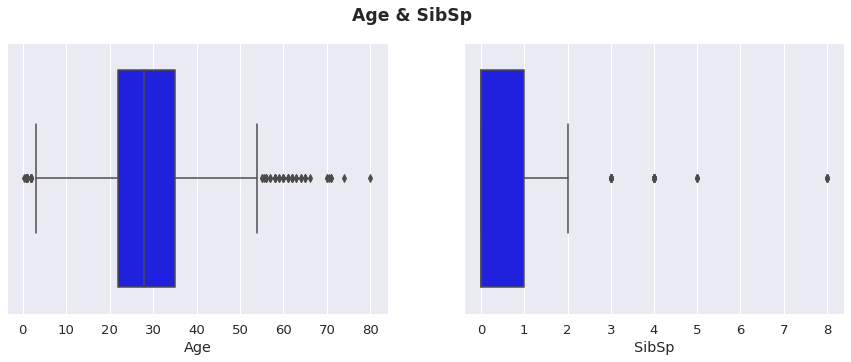

In [ ]:
#Age & SibSp
#
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Age & SibSp',weight='bold')
sns.boxplot(ax=axes[0],x=data['Age'])
sns.boxplot(ax=axes[1],x=data['SibSp'])

-Age column contains outliers. History shows that the oldest person who aboarded the Titanic was 80 years old while the youngest was just a few months. The outliers are therefore within the range.

-Sibsp (Number of Siblings/Spouses Aboard) also has outliers. The outliers could be true observations and therefore we will keeep them

##**Exploratory Data Analysis**

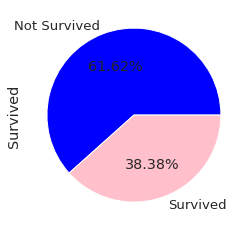

In [ ]:
#percentage of passenger survival?
labels = ['Not Survived','Survived']
data['Survived'].value_counts().plot(kind='pie',autopct='%.2f%%',labels=labels)



More people died (61.62%) than survived (38.38%)

Text(0.5, 1.0, 'Survived vs Class')

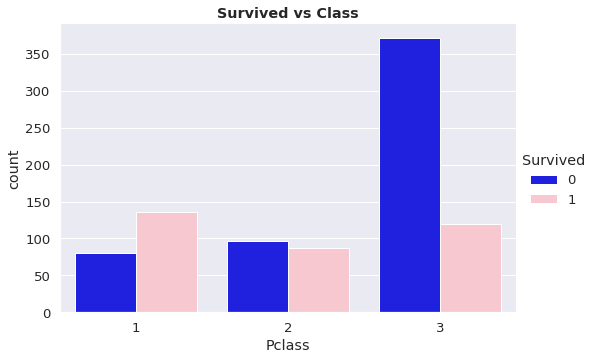

In [ ]:
#Survived vs Class
sns.catplot(x='Pclass',hue='Survived',data=data,kind='count',aspect=1.5)
plt.title('Survived vs Class',weight='bold')

-More of the first class passengers survived because their cabins were closer to the lifeboats

-on the other hand, most third-class passengers died. These passengers were confined to their area of the Titanic. They were stucked in the lower decks had no idea what was happening and were left trapped and confused 

Text(0.5, 1.0, 'Gender vs class survival')

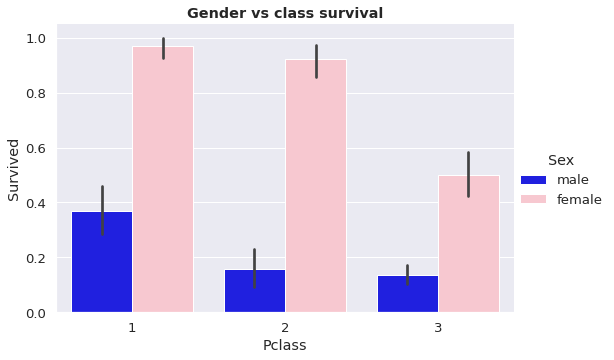

In [ ]:
#Gender vs class survival
sns.catplot(x='Pclass',y='Survived',hue='Sex', kind='bar', data=data,aspect=1.5)
plt.title('Gender vs class survival',weight='bold')

-Women had a much higher chance of survival — regardless of what class they were in. They were given lifeboat priority

Text(0.5, 1.0, 'Survival vs Port')

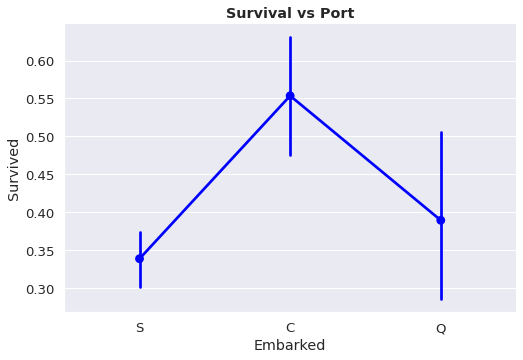

In [ ]:
#Embarked vs survival
sns.catplot(x='Embarked',y='Survived', kind='point', data=data,aspect=1.5)
plt.title('Survival vs Port',weight='bold')

-Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown.

The highest rate of survival was from Cherbourg(C), France. This could be because of passenger class or gender distribution.

In [ ]:
# plot correlation heatmap to find out correlations
corr = data.corr()
plt.figure(figsize=(16,12))
data.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.0,-0.005007,-0.03514,0.03421,-0.05753,-0.001652,0.01266
Survived,-0.005007,1.0,-0.3385,-0.06491,-0.03532,0.08163,0.2573
Pclass,-0.03514,-0.3385,1.0,-0.3399,0.08308,0.01844,-0.5495
Age,0.03421,-0.06491,-0.3399,1.0,-0.2333,-0.1725,0.09669
SibSp,-0.05753,-0.03532,0.08308,-0.2333,1.0,0.4148,0.1597
Parch,-0.001652,0.08163,0.01844,-0.1725,0.4148,1.0,0.2162
Fare,0.01266,0.2573,-0.5495,0.09669,0.1597,0.2162,1.0


<Figure size 1152x864 with 0 Axes>

-PassengerId,	Pclass, Age	and SibSp have weak negative correlation with survived variable

-Parch and fare have weak positive correlation with survived variable

-

##**Feature Engineering**

Here we will perform the following:
- Extract Title from the name column. This maybe useful in classification of passenger class
- Drop PassengerId,Name,Ticket columns as the have no effect on passenger survival
- perform label encoding


In [ ]:
#extract titles from the name column
data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=True)
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
#drop PassengerId','Name','Ticket' columns
data.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [ ]:
#Label encoding
#encode sex,embarked,title columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])
data['Title'] = le.fit_transform(data['Title'])

##**Model Training**
##**K-nearest neighbor (kNN) classifier**

We will follow the following steps in implementing knn classifier

  - Declare feature and target variables.
  - split data into training and testing sets.
  - Feature scaling
  - Fit knn
  - Compute the accuracy (percentage of correct classification).
  - Report the confusion matrix 
  - Repeat steps above twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of the modeling.
  - Suggest and apply at least one of the optimization techniques
  - Provide further recommendations to improve both classifiers.

##**Declare feature and target variable**

In [ ]:
X = data.drop(['Survived'], axis=1)
y = data['Survived']


##**Split data into separate training and test set**

-We will partition our dataset into 80-20 sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##**Feature Scaling**

We will use StandardScaler so that our feature values are centered around the mean with a unit standard deviation

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

##**Fit Model with 80-20 sets**

In [ ]:
#split dataset into 80-20 sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# instantiate the model
knn = KNeighborsClassifier()

# fit the model to the training set
knn.fit(X_train, y_train)

#make predictions
y_pred = knn.predict(X_test)

y_pred

#print model accuracy

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Print the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Model accuracy score: 0.7430
Confusion matrix

 [[96 14]
 [32 37]]

True Positives(TP) =  96

True Negatives(TN) =  37

False Positives(FP) =  14

False Negatives(FN) =  32


-Our model has an accuracy of 74.30%. This is quite good for our classification

**Confusion Matrix**

A confusion matrix summarizes the classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category represented in a tabular form.

In this case, the confusion matrix shows:

True Positives (Actual Positive:1 and Predict Positive:1) - 96

True Negatives (Actual Negative:0 and Predict Negative:0) - 37

False Positives (Actual Negative:0 but Predict Positive:1) - 14 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 32 (Type II error)

Therefore, our model has 96 + 37 = 133 correct predictions and 14 + 32 = 46 incorrect predictions

##**Fit Model with 70-30 sets**

In [ ]:
#split dataset into 70-30 sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# instantiate the model
knn = KNeighborsClassifier()

# fit the model to the training set
knn.fit(X_train, y_train)

#make predictions
y_pred = knn.predict(X_test)

y_pred

#print model accuracy

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Print the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Model accuracy score: 0.7164
Confusion matrix

 [[137  31]
 [ 45  55]]

True Positives(TP) =  137

True Negatives(TN) =  55

False Positives(FP) =  31

False Negatives(FN) =  45


-Our model has an accuracy of 71.64%. This is also quite good for our classification though a decrease


The confusion matrix shows:

True Positives (Actual Positive:1 and Predict Positive:1) - 137

True Negatives (Actual Negative:0 and Predict Negative:0) - 55

False Positives (Actual Negative:0 but Predict Positive:1) - 31 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 45 (Type II error)

Therefore, our model has 137 + 55 = 192 correct predictions and 31 + 45 = 76 incorrect predictions

**Note**

-There is a fall in accuracy

-Number of correct and incorrect predictions increased

-Icreased chance of making type I & II errors

##**Train Model with 60-40 sets**

In [ ]:
#split dataset into 60-40 sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

# instantiate the model
knn = KNeighborsClassifier()

# fit the model to the training set
knn.fit(X_train, y_train)

#make predictions
y_pred = knn.predict(X_test)

y_pred

#print model accuracy

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Print the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Model accuracy score: 0.7199
Confusion matrix

 [[184  37]
 [ 63  73]]

True Positives(TP) =  184

True Negatives(TN) =  73

False Positives(FP) =  37

False Negatives(FN) =  63


-There is a slight fall in accuracy to 71.64%. 


The confusion matrix shows:

True Positives (Actual Positive:1 and Predict Positive:1) - 184

True Negatives (Actual Negative:0 and Predict Negative:0) - 73

False Positives (Actual Negative:0 but Predict Positive:1) - 37 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 63 (Type II error)

Therefore, our model has 184 + 73 = 257 correct predictions and 37 + 63 = 100 incorrect predictions

**Note**

-There is a fall in accuracy

-Number of correct and incorrect predictions increased

-Icreased chance of making type I & II errors

##**Model Optimization**

We will tune our first model because it performs better compared to the other models 

In [ ]:
#hypaparameter tuning with 80,20
#apply gridsearch
from sklearn.model_selection import GridSearchCV

neighbor_range = np.arange(1, 41)
knn = KNeighborsClassifier()

params = {'n_neighbors' : neighbor_range,
         'weights' : ['uniform', 'distance'],
         'metric' : ['manhattan', 'euclidean', 'minkowski']}


model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

    

print("Best parameters:", model.best_params_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'distance'}


In [ ]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# instantiate the model
knn = KNeighborsClassifier(metric='manhattan',n_neighbors=29,weights='distance')


# fit the model to the training set
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

y_pred

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Model accuracy score: 0.7877
Confusion matrix

 [[96 14]
 [24 45]]

True Positives(TP) =  96

True Negatives(TN) =  45

False Positives(FP) =  14

False Negatives(FN) =  24


-Our model accuracy improved to  78.77%. 


The confusion matrix shows:

True Positives (Actual Positive:1 and Predict Positive:1) - 96

True Negatives (Actual Negative:0 and Predict Negative:0) - 45

False Positives (Actual Negative:0 but Predict Positive:1) - 14 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 24 (Type II error)

Therefore, our model has 96 + 45 = 141 correct predictions and 14 + 24 = 28 incorrect predictions



##**Challenge the solution**

##**Check for overfitting and Underfitting**

If our model does much better on the training set than on the test set, then we're likely overfitting. For example, it would be a big red flag if our model saw 99% accuracy on the training set but only 55% accuracy on the test set

on the other hand, an underfit model doesn't fully learn each and every example in the dataset. In such cases, we see a low score on both the training set and test/validation

In [ ]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9846
Test set score: 0.7877


The training-set accuracy score is 98.46% while the test-set accuracy to be 78.77% These two values are  comparable. So, there is no question of overfitting

##**Conclusions**
-Our model performance ranges between 71.00%-79.00% which means our model is doing a very good job in terms of making prediction. However, this accuracy score does not give the underlying distribution of values neither does it tell anything about the type of errors our classifer is making. So, we used confusion matrix

-Our model does well with 80:20 split ratio. Chances of making errors increased with 70:30 and 60:40 ratios and for this can lead to overfitting or underfitting

##**Recommendations**

-Try other classification models and performance tools such as ROC Curve